# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Coleta de Dados

In [2]:
# Ler dataset
df = pd.read_csv('../data/raw/diabetes_prediction_dataset.csv')
# Exibir 5 primeiros registros
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## 2. Descrição dos dados

## 2.1. Dicionário de dados

In [3]:
diabetes_dict = pd.DataFrame([
   {
        'variavel': 'gender',
        'descricao': 'Refere-se ao sexo biológico do indivíduo',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
        'escala': 'male, female, other'
   },{
        'variavel': 'age',
        'descricao': 'Refere-se a idade do indivíduo',
        'tipo': 'quantitativa',
        'subtipo': 'discreta',
        'escala': '0.08 - 1(contínua) / 1 - 80(discreta)'
   },{
        'variavel': 'hypertension',
        'descricao': 'Refere-se a condição médica na qual a pressão sanguínea é cronicamente elevada',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
        'escala': '0, 1'
   },{
        'variavel': 'heart_disease',
        'descricao': 'Refere-se a uma outra condição médica associada a um risco aumentado de desenvolver diabetes',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
        'escala': '0, 1'
   },{
        'variavel': 'smoking_history',
        'descricao': 'Refere-se a histórico de fumante do indivíduo',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
        'escala':'No info, never, not current, former, current, ever'
   },{
        'variavel': 'bmi',
        'descricao': 'Refere-se ao Body Mass Index (índice de massa corporal), o qual mede a gordura corporal em função da altura e peso.',
        'tipo': 'quantitativa',
        'subtipo': 'contínua',
        'escala': '10.01 - 95.69'
   },{
        'variavel': 'HbA1c_level',
        'descricao': 'Refere-se ao nível da hemoglobina A1c (hemoglobina glicada), a qual mede a média do nível de açúcar no sangue no período de 2-3 meses.',
        'tipo': 'quantitativa',
        'subtipo': 'contínua',
        'escala': '3.5 - 9.0'
   },{
        'variavel': 'blood_glucose_level',
        'descricao': 'Refere-se ao nível de glicose no sangue em um dado intervalo de tempo.',
        'tipo': 'quantitativa',
        'subtipo': 'contínua',
        'escala': '80 - 300'
   },{
        'variavel': 'diabetes',
        'descricao': 'É uma condição médica que indica se o paciente possui ou não diabetes, também é a variável alvo',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
        'escala': '0, 1'
   }])
diabetes_dict.to_csv('../data/external/diabetes_dict.csv', index = False)
diabetes_dict

,variavel,descricao,tipo,subtipo,escala
0,gender,Refere-se ao sexo biológico do indivíduo,qualitativa,nominal,"male, female, other"
1,age,Refere-se a idade do indivíduo,quantitativa,discreta,0.08 - 1(contínua) / 1 - 80(discreta)
2,hypertension,Refere-se a condição médica na qual a pressão ...,qualitativa,nominal,"0, 1"
3,heart_disease,Refere-se a uma outra condição médica associad...,qualitativa,nominal,"0, 1"
4,smoking_history,Refere-se a histórico de fumante do indivíduo,qualitativa,nominal,"No info, never, not current, former, current, ..."
5,bmi,Refere-se ao Body Mass Index (índice de massa ...,quantitativa,contínua,10.01 - 95.69
6,HbA1c_level,Refere-se ao nível da hemoglobina A1c (hemoglo...,quantitativa,contínua,3.5 - 9.0
7,blood_glucose_level,Refere-se ao nível de glicose no sangue em um ...,quantitativa,contínua,80 - 300
8,diabetes,É uma condição médica que indica se o paciente...,qualitativa,nominal,"0, 1"


---
   - São 5 variáveis qualitativas nominais, 3 quantitativas contínuas e 1 quantitativa discreta
---

## 3. Perguntas de partida e hipóteses

- Existem dados faltantes? Se sim, Em quais variáveis e quantos? 
- Estão em tipos corretos(Ex: É Float, mas poderia ser Int)?
- Qual a distribuição dos dados? (Variável por variável)
- O gênero masculino tem uma tendência maior de ter diabetes?
- As Pessoas que apresentam hipertensão também têm diabetes?
- Pessoas mais velhas têm uma tendência maior de ter diabetes?
- O hábito de fumar tem uma tendência maior de estar associado à diabetes?
- Pessoas com hipertensão e alto IMC têm uma predisposição a ter diabetes?
- Indivíduos com alto IMC têm uma tendência maior de ter diabetes?
- Qual é a relação entre o nível de hemoglobina A1c no sangue e a diabetes?
- Pessoas com alto índice de hemoglobina A1c e glicemia no sangue têm uma tendência maior de ter diabetes?

---

### Existem dados faltantes? Se sim, Em quais variáveis e quantos? 

In [4]:
colunas_de_dados_faltantes = df.isnull().sum().loc[lambda x: x>0]
linhas_dados_faltantes = df.isna().any(axis=1).sum()

print_colunas_de_dados_faltantes = lambda data_column: "Concluimos que o dataset não possui valores faltantes em nenhuma coluna ou linha" if data_column.empty else f"sabemos que as variáveis {data_column.axes[0].to_list()} contém valores faltantes. Além disso sabemos que temos `{linhas_dados_faltantes}` linhas com valores faltantes.\n As próximas análises aqui serão realizadas sem considerar os dados faltantes"

display(Markdown(
    "---\n"
    f"A partir dessa informação `{print_colunas_de_dados_faltantes(colunas_de_dados_faltantes)}`."
    "\n\n ---"
)) 

#df.dropna(inplace=True)

---
A partir dessa informação `Concluimos que o dataset não possui valores faltantes em nenhuma coluna ou linha`.

 ---

### Estão na tipagem correta(Ex: É Float, mas poderia ser Int)?

In [5]:
def verificar_tipos_e_memoria(df):
   memory_usage = (df.memory_usage(deep=True))/1024**2
   total_memory = memory_usage.sum()

   # Entender os tipos das variáveis, contagens e entradas
   df.info()

   print(memory_usage)
   print(f'\nTotal memória utilizada: {total_memory:.2f}MB')
   return total_memory

memory_usage_initial = verificar_tipos_e_memoria(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
Index                  0.000122
gender                 5.929110
age                    0.762939
hypertension           0.762939
heart_disease          0.762939
smoking_history        6.040796
bmi                    0.762939
HbA1c_level            0.762939
blood_glucos

---
   * Das variáveis que o dataset dispõe, 3 estão como "float64", 4 como "int64" e 2 como "object"(string)
   * Podemos observar que as colunas "smoking_history", "gender" estão sendo armazenas como "object", mas pelo fato de serem dados categóricos e definidos, é uma boa prática transforma-las em "category"
   * As colunas "heart_disease", "diabetes" e "hypertension", suas escalas são binárias(0,1), um tipo que representa bem esses valores é o "bool", que possui a mesma escala, sendo assim, pode serem transformadas de "int64" para "bool"
---

In [6]:
df[["smoking_history", "gender"]] = df[["smoking_history", "gender"]].astype("category")
df[["heart_disease", "diabetes", "hypertension"]] = df[["heart_disease", "diabetes", "hypertension"]].astype("bool")

In [7]:
memory_usage_final = verificar_tipos_e_memoria(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  category
 1   age                  100000 non-null  float64 
 2   hypertension         100000 non-null  bool    
 3   heart_disease        100000 non-null  bool    
 4   smoking_history      100000 non-null  category
 5   bmi                  100000 non-null  float64 
 6   HbA1c_level          100000 non-null  float64 
 7   blood_glucose_level  100000 non-null  int64   
 8   diabetes             100000 non-null  bool    
dtypes: bool(3), category(2), float64(3), int64(1)
memory usage: 3.5 MB
Index                  0.000122
gender                 0.095648
age                    0.762939
hypertension           0.095367
heart_disease          0.095367
smoking_history        0.095896
bmi                    0.762939
HbA1c_level            

In [8]:
diminuicao_total_em_porc = ((memory_usage_initial-memory_usage_final)/memory_usage_initial)*100

display(Markdown(
   f"---\n"
   f"* Houve uma `diminuição de {diminuicao_total_em_porc:.2f}% de memoria`, algo significativo. Passou de `{memory_usage_initial:.2f}MB para {memory_usage_final:.2f}MB`\n"
   f"---"
))
   

---
* Houve uma `diminuição de 79.61% de memoria`, algo significativo. Passou de `17.31MB para 3.53MB`
---

### Qual a distribuição dos dados? (Variável por variável)

In [9]:
# Calcular as principais medidas estatísticas do dataset para identificação de outliers e também entendimento dos dados
df.describe(include="all").round(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.00,100000,100000,100000,100000.00,100000.00,100000.00,100000
unique,3,NaN,2,2,6,NaN,NaN,NaN,2
top,Female,NaN,False,False,No Info,NaN,NaN,NaN,False
freq,58552,NaN,92515,96058,35816,NaN,NaN,NaN,91500
mean,NaN,41.89,NaN,NaN,NaN,27.32,5.53,138.06,NaN
std,NaN,22.52,NaN,NaN,NaN,6.64,1.07,40.71,NaN
min,NaN,0.08,NaN,NaN,NaN,10.01,3.50,80.00,NaN
25%,NaN,24.00,NaN,NaN,NaN,23.63,4.80,100.00,NaN
50%,NaN,43.00,NaN,NaN,NaN,27.32,5.80,140.00,NaN
75%,NaN,60.00,NaN,NaN,NaN,29.58,6.20,159.00,NaN


In [10]:
categorias = diabetes_dict.query("tipo=='qualitativa'").escala.to_list()
variaveis = diabetes_dict.query("tipo=='qualitativa'").variavel.to_list()

codigo = "\n".join([f"* A variável `{variavel}` possui {len(categoria.split(','))} categorias: `{categoria}`" for variavel, categoria in zip(variaveis,categorias)])

display(Markdown(
   "---\n"
   f"* O gênero mais frequente é `mulher` com 58% do total\n"
   f"* A média da idade nesse dataset é `41.89 anos` e mediana `43 anos`\n"
   f"* A média do índice de massa corporal('bmi') é `27.32`	e mediana com o mesmo valor\n"
   "\n"
   f"{codigo}\n"
   "\n"
   f"* A quantidade de casos que não apresentam diabetes(False) é `91500 pessoas` e `8500 pessoas` apresentam diabetes(True)\n"
   f" \n"
   
   "---\n"
))

---
* O gênero mais frequente é `mulher` com 58% do total
* A média da idade nesse dataset é `41.89 anos` e mediana `43 anos`
* A média do índice de massa corporal('bmi') é `27.32`	e mediana com o mesmo valor

* A variável `gender` possui 3 categorias: `male, female, other`
* A variável `hypertension` possui 2 categorias: `0, 1`
* A variável `heart_disease` possui 2 categorias: `0, 1`
* A variável `smoking_history` possui 6 categorias: `No info, never, not current, former, current, ever`
* A variável `diabetes` possui 2 categorias: `0, 1`

* A quantidade de casos que não apresentam diabetes(False) é `91500 pessoas` e `8500 pessoas` apresentam diabetes(True)
 
---


##### Distribuição das variáveis qualitativas

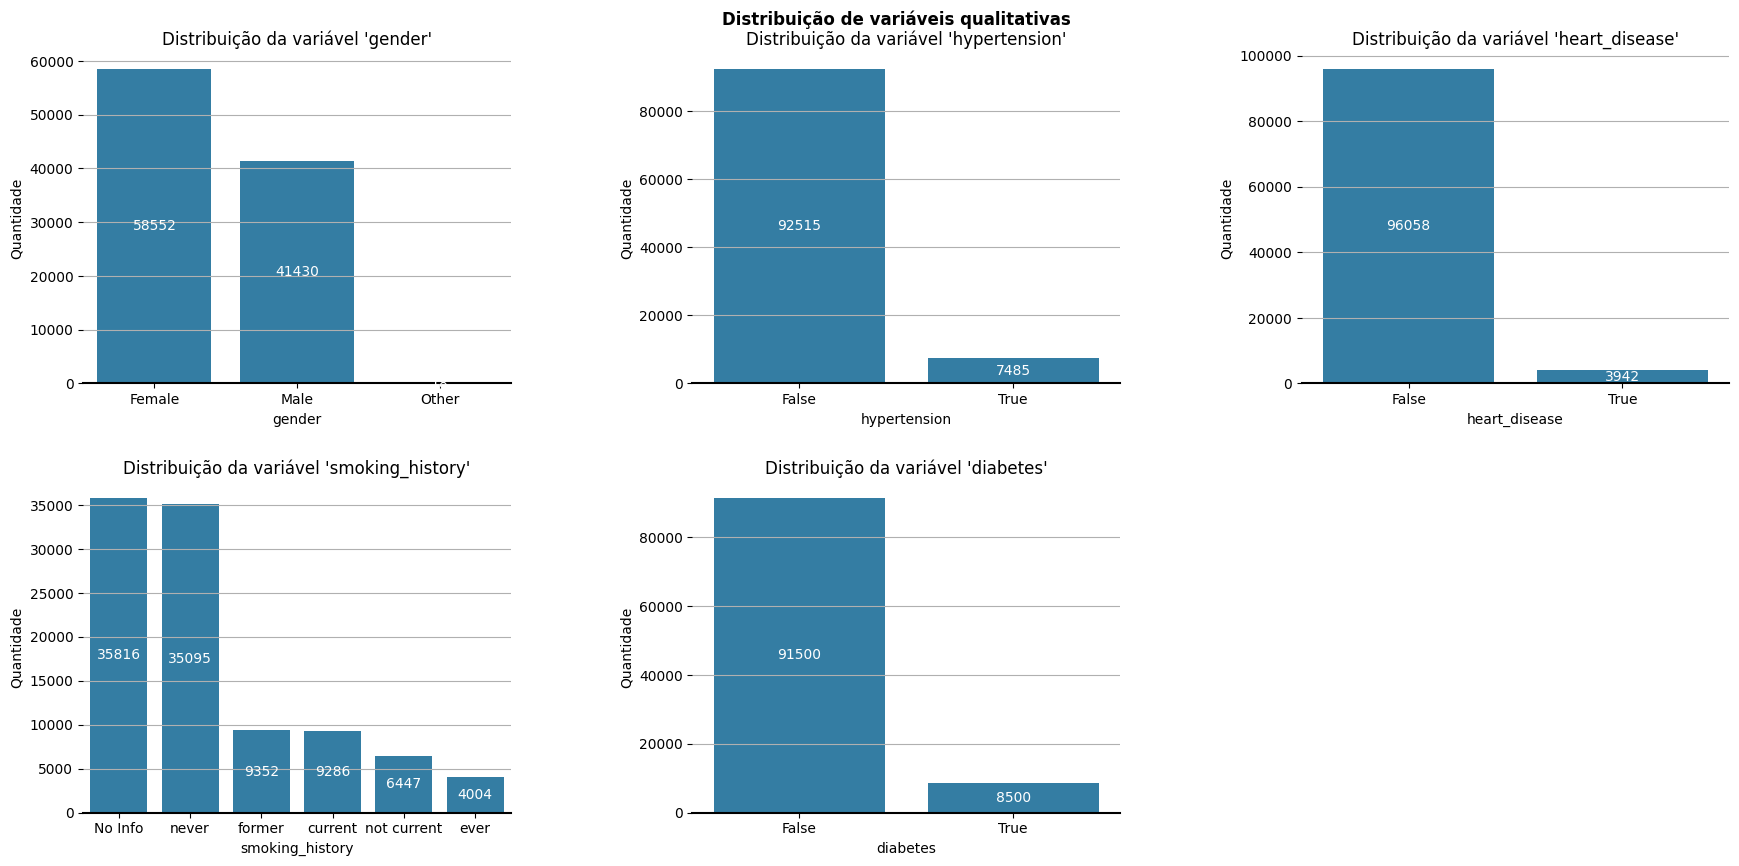

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18,9))
axes[-1, -1].remove()
plt.tight_layout(pad=4, w_pad=10, h_pad=5)  
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(diabetes_dict.query("tipo == 'qualitativa'").variavel.to_list()):
   
   order = df[variavel].value_counts().index
   ax = sns.countplot(
      data=df,
      x=variavel,
      ax=axes.flatten()[i],
      color="#0a75ad",
      alpha=0.9,
      order=order
   )
   ax.bar_label(
      ax.containers[0],
      fmt='%.0f',
      label_type='center',
      color='white'
   )
   ax.set(frame_on=False)
   ax.axhline(0, color="k", clip_on=False)
   ax.set_title(f"Distribuição da variável '{variavel}'")
   ax.set_ylabel('Quantidade')
   ax.grid(axis='y', linestyle='-')
plt.show()

* Mais pessoas do sexo feminino participaram da pesquisa.
* Houve bem mais pessoas sem histórico de hipertensão ou doenças cardíacas.
* A quantidade de pessoas que nunca fumaram ou não se tem informação são próximas.
* A grande maioria das pessoas não possuem diabetes.

##### Distribuição das variáveis quantitativas

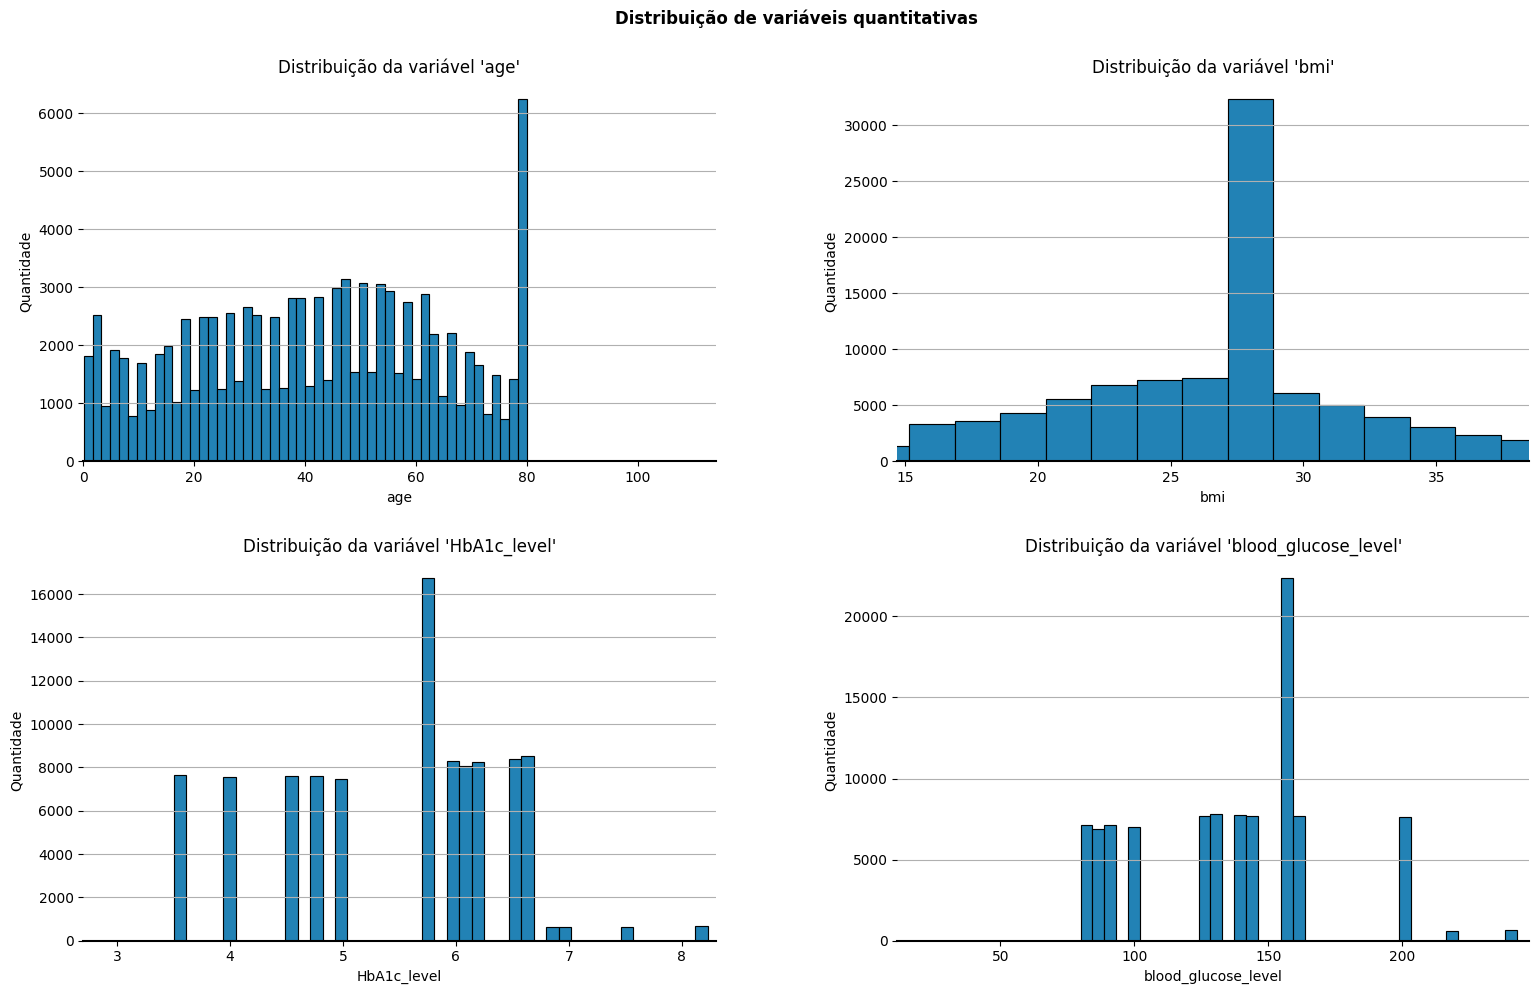

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))

plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold', y=1.01)
for i, variavel in enumerate(diabetes_dict.query("tipo == 'quantitativa'").variavel.to_list()):
   Q1 = df[variavel].quantile(0.25)
   Q3 = df[variavel].quantile(0.75)

   IQR = Q3 - Q1

   limite_inferior = Q1 - 1.5 * IQR
   if limite_inferior < 0:
      limite_inferior = 0
   limite_superior = Q3 + 1.5 * IQR

   ax = sns.histplot(
      data=df,
      x=variavel,
      ax=axes.flatten()[i],
      color="#0a75ad",
      alpha=0.9,
      bins=50
   )
   ax.set(frame_on=False)
   ax.axhline(0, color="k", clip_on=False)
   ax.set_title(f"Distribuição da variável '{variavel}'")
   plt.xlabel(variavel)
   ax.set_ylabel('Quantidade')
   ax.grid(axis='y', linestyle='-')
   ax.set_xlim(left=limite_inferior, right=limite_superior)

plt.show()

---

* A moda de idade foi de pessoas próximas à 80 anos. Nas outras idades a quantidade foi mais distribuída.
* Houve uma concentração de pessoas na variável BMI (IMC) entre 25 e 30.
* Houve uma concentração de pessoas na variável HbA1c_level entre 5 e 6 e em blood_glucose_level entre 150 e 200.

---

### O gênero masculino tem uma tendência maior de ter diabetes?

In [13]:
diabetes_genero = df.groupby('gender')['diabetes'].sum()
print("\nContagem diabetes em cada gênero:\n",diabetes_genero)

total_por_genero = df['gender'].value_counts()
print("\nContagem de gêneros no dataset:\n",total_por_genero)

proporcao_diabetes_por_genero = diabetes_genero / total_por_genero
print("\nProporcao_diabetes_por_genero:\n",proporcao_diabetes_por_genero)


Contagem diabetes em cada gênero:
 gender
Female    4461
Male      4039
Other        0
Name: diabetes, dtype: int64

Contagem de gêneros no dataset:
 Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

Proporcao_diabetes_por_genero:
 gender
Female    0.076189
Male      0.097490
Other     0.000000
dtype: float64


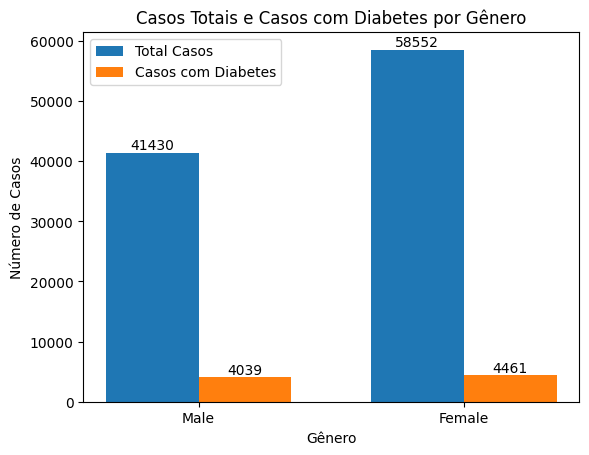

In [14]:
#Código para plotagem das barras
total_masculino = df[df['gender'] == 'Male'].shape[0]
total_feminino = df[df['gender'] == 'Female'].shape[0]
diabetes_masculino = df[(df['gender'] == 'Male') & (df['diabetes'] == True)].shape[0]
diabetes_feminino = df[(df['gender'] == 'Female') & (df['diabetes'] == True)].shape[0]

fig, ax = plt.subplots()

generos = ['Male', 'Female']
x = range(len(generos))
total_casos = [total_masculino, total_feminino]
casos_diabetes = [diabetes_masculino, diabetes_feminino]
bar_width = 0.35

bar1 = ax.bar(x, total_casos, bar_width, label='Total Casos')
bar2 = ax.bar([i + bar_width for i in x], casos_diabetes, bar_width, label='Casos com Diabetes')

ax.set_xlabel('Gênero')
ax.set_ylabel('Número de Casos')
ax.set_title('Casos Totais e Casos com Diabetes por Gênero')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(generos)
ax.legend()

# Adicionando os valores das barras
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., height,
                '%d' % int(height), ha='center', va='bottom')

plt.show()

---
   * Homens tendem a ter uma maior predisposição a diabetes do que as mulheres, cerca de 27.96% a mais
   * O gênero "Other", não possui nenhum caso de diabetes e são cerca de somente 18 pessoas classificadas como "Other"
---

### As Pessoas que apresentam hipertensão também têm diabetes?

In [15]:
diabetes_hipertensao = df[df['hypertension'] == 1]['diabetes'].sum()

total_hipertensao = df['hypertension'].sum()

diabetes_sem_hipertensao = df[df['hypertension'] == 0]['diabetes'].sum()

total_sem_hipertensao = len(df) - total_hipertensao

diabetes_hiper = diabetes_hipertensao / total_hipertensao

diabetes_sem_hiper = diabetes_sem_hipertensao / total_sem_hipertensao

print("Proporção de diabetes entre pessoas com hipertensão:", diabetes_hiper)
print("Proporção de diabetes entre pessoas sem hipertensão:", diabetes_sem_hiper)

Proporção de diabetes entre pessoas com hipertensão: 0.27895791583166335
Proporção de diabetes entre pessoas sem hipertensão: 0.06930767983570232


---

* Pessoas com hipertensão tendem a terem mais chances de serem diabeticas
* Um total de aproximadamente, `20% de chance a mais de ser diabético caso vc tenha hipertensão`

---

### Pessoas mais velhas têm uma tendência maior de ter diabetes?

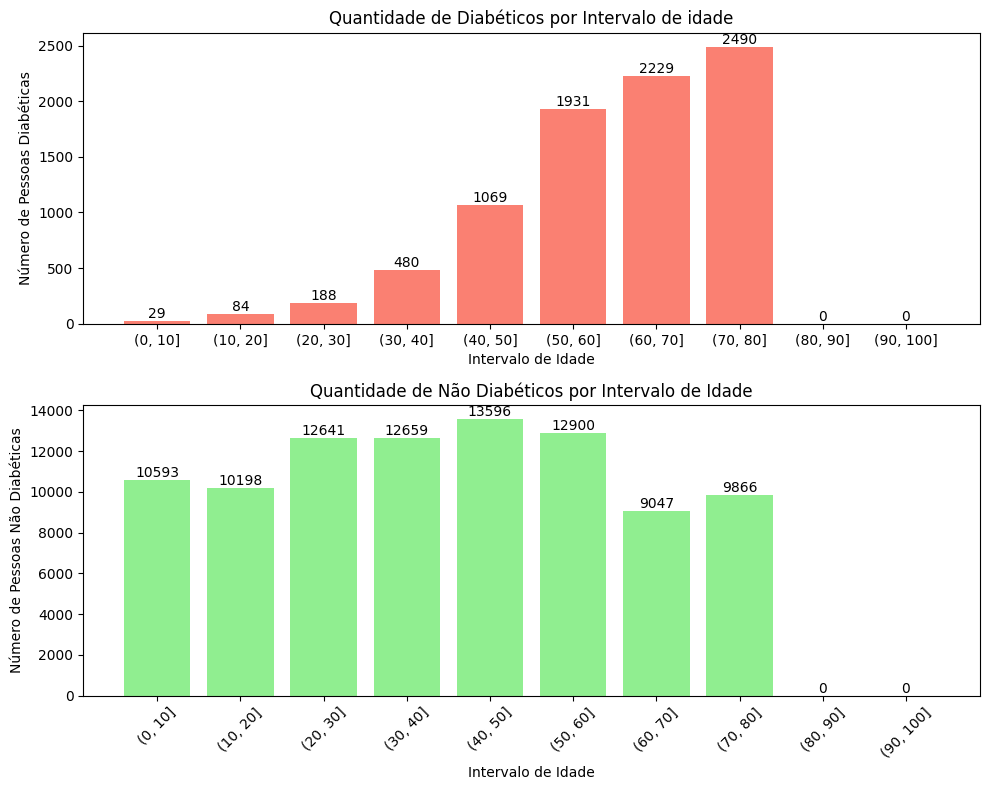

In [16]:
# Criando os intervalos de idade
intervalos_idade = list(range(0, 101, 10))  # Intervalos de 10 em 10

# Separando os dados da idade em intervalos
df['idade_intervalo'] = pd.cut(df['age'], bins=intervalos_idade)

# Calculando a quantidade de diabéticos em cada intervalo da idade
diabeticos_por_intervalo = df.groupby('idade_intervalo')['diabetes'].sum()

# Calculando a quantidade de não diabéticos em cada intervalo da idade
nao_diabeticos_por_intervalo = df.groupby('idade_intervalo')['diabetes'].count() - diabeticos_por_intervalo

# Plotando os gráficos de barras em subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de barras para quantidade de diabéticos por intervalo de idade
bars1 = ax1.bar(diabeticos_por_intervalo.index.astype(str), diabeticos_por_intervalo.values, color='salmon')
ax1.set_xlabel('Intervalo de Idade')
ax1.set_ylabel('Número de Pessoas Diabéticas')
ax1.set_title('Quantidade de Diabéticos por Intervalo de idade')

# Adicionando a quantidade em cima de cada barra no primeiro gráfico
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, height,
            ha='center', va='bottom')

# Gráfico de barras para quantidade de não diabéticos por intervalo de idade
bars2 = ax2.bar(nao_diabeticos_por_intervalo.index.astype(str), nao_diabeticos_por_intervalo.values, color='lightgreen')
ax2.set_xlabel('Intervalo de Idade')
ax2.set_ylabel('Número de Pessoas Não Diabéticas')
ax2.set_title('Quantidade de Não Diabéticos por Intervalo de Idade')

# Adicionando a quantidade em cima de cada barra no segundo gráfico
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height, height,
            ha='center', va='bottom')

# Ajustes de layout
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()
plt.show()

---
   ##### Resalva:
   * Para analisar a idade em relação a diabetes, será considerado intervalos de idade de 10 em 10
   ##### Resultados:
   * Existe uma tendência de aumento na quantidade de diabéticos à medida que a idade aumenta


---

### O hábito de fumar tem uma tendência maior de estar associado à diabetes?


C:\Users\rafae\AppData\Local\Temp\ipykernel_21676\2133232058.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  agrupamento_pelo_historico["total"] = agrupamento_pelo_historico.sum(axis=1)


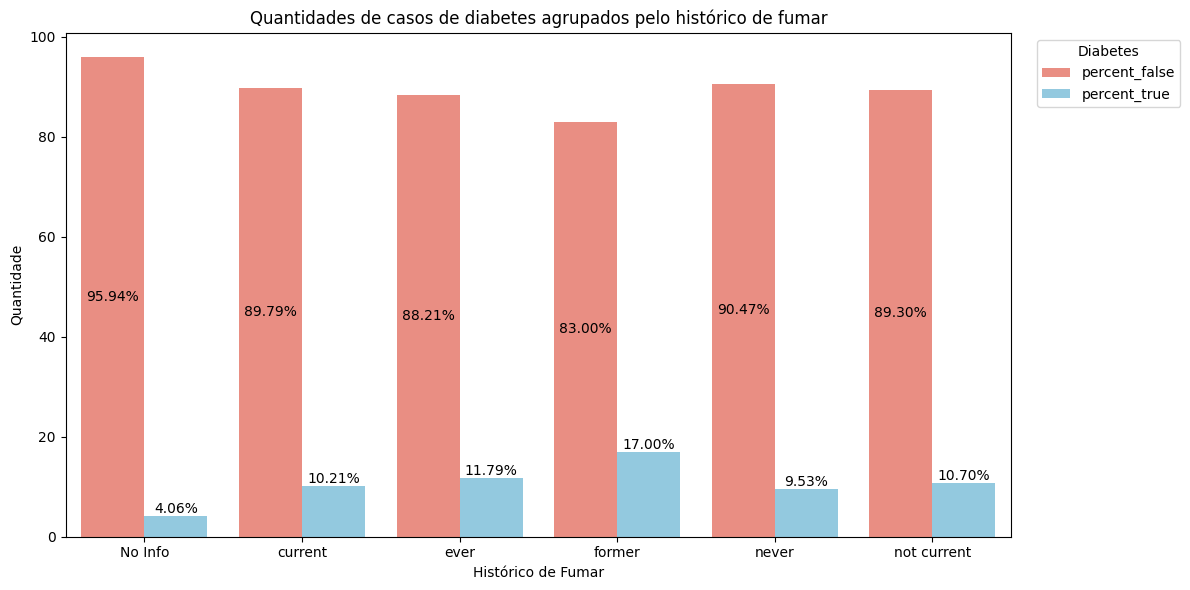

In [17]:
# Agrupar pelo histórico de fumar e contar os valores True e False para diabetes
agrupamento_pelo_historico = df.groupby("smoking_history")["diabetes"].value_counts().unstack(fill_value=0)

# Resetar o índice para plotagem
agrupamento_pelo_historico = agrupamento_pelo_historico.reset_index()

agrupamento_pelo_historico["total"] = agrupamento_pelo_historico.sum(axis=1)
agrupamento_pelo_historico["percent_false"] = (agrupamento_pelo_historico[False] / agrupamento_pelo_historico["total"]) * 100
agrupamento_pelo_historico["percent_true"] = (agrupamento_pelo_historico[True] / agrupamento_pelo_historico["total"]) * 100

# Reorganizar os dados para barras lado a lado
agrupamento_pelo_historico_melted = pd.melt(
                                    agrupamento_pelo_historico,
                                    id_vars=['smoking_history'],
                                    value_vars=['percent_false', 'percent_true'],
                                    var_name='diabetes', 
                                    value_name='percentual')

# Plotar
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=agrupamento_pelo_historico_melted, 
                  x="smoking_history",
                  y="percentual",
                  hue="diabetes",
                  palette=["salmon", "skyblue"])
ax.bar_label(
      ax.containers[0],
      fmt='%.2f%%',
      label_type='center',
      color='black'
   )
ax.bar_label(
      ax.containers[1],
      fmt='%.2f%%',
      label_type='edge',
      color='black'
   )

plt.title('Quantidades de casos de diabetes agrupados pelo histórico de fumar')
plt.xlabel('Histórico de Fumar')
plt.ylabel('Quantidade')
plt.legend(title="Diabetes",
           bbox_to_anchor=( 1.02 , 1 ),
           loc="upper left")
plt.tight_layout()
plt.show()


---

* A classe "former" segundo CDC - Centers for Disease Control and Prevention, classificada como um adulto que fumou pelo menos 100 cigarros na vida, mas que havia parado de fumar no momento da entrevista, foi a que obteve maior porcentagem com `17%`
* Comparando a classe "ever" e "never", tem uma diferença significativa de `2.56%`. Ou seja, Pessoas que já foram fumantes em comparação com pessoas que nunca fumaram, tem uma maior chance de ter diabetes no futuro.

---

### Pessoas com hipertensão e alto IMC têm uma predisposição a ter diabetes?


In [18]:
df['high_bmi'] = df['bmi'] > 30
df['predisposition'] = df['hypertension'] & df['high_bmi']
df['no_predisposition'] = ~df['hypertension'] & ~df['high_bmi']


# Contar as ocorrências de diabetes entre pessoas com predisposição
predispostos_com_diabetes = df[df['predisposition'] & df['diabetes'] == 1].shape[0]
predispostos_sem_diabetes = df[df['predisposition'] & df['diabetes'] == 0].shape[0]

# Contar as ocorrências de diabetes entre pessoas sem predisposição
sem_predisposicao_com_diabetes = df[df['no_predisposition'] & df['diabetes'] == 1].shape[0]
sem_predisposicao_sem_diabetes = df[df['no_predisposition'] & df['diabetes'] == 0].shape[0]

# Calcular as proporções
total_predispostos = predispostos_com_diabetes + predispostos_sem_diabetes
total_sem_predisposicao = sem_predisposicao_com_diabetes + sem_predisposicao_sem_diabetes

proporcao_predisposto_com_diabetes = predispostos_com_diabetes / total_predispostos
proporcao_sem_predisposicao_com_diabetes = sem_predisposicao_com_diabetes / total_sem_predisposicao

print(f"Proporção de pessoas com predisposição que têm diabetes: {proporcao_predisposto_com_diabetes:.2%}")
print(f"Proporção de pessoas sem predisposição que têm diabetes: {proporcao_sem_predisposicao_com_diabetes:.2%}")



Proporção de pessoas com predisposição que têm diabetes: 1.14%
Proporção de pessoas sem predisposição que têm diabetes: 3.32%


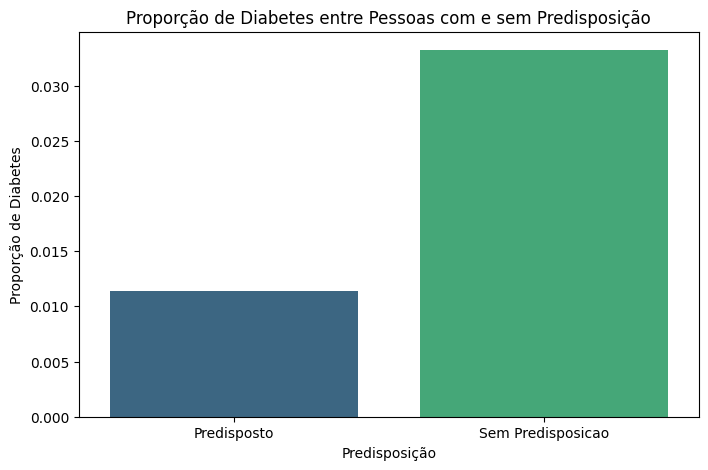

In [19]:
plot_data = pd.DataFrame({
    'Predisposicao': ['Predisposto', 'Sem Predisposicao'],
    'Com Diabetes': [proporcao_predisposto_com_diabetes, proporcao_sem_predisposicao_com_diabetes]
})

# Plotar os dados
plt.figure(figsize=(8, 5))
sns.barplot(x='Predisposicao', 
            y='Com Diabetes', 
            data=plot_data,
            palette='viridis')
plt.title('Proporção de Diabetes entre Pessoas com e sem Predisposição')
plt.ylabel('Proporção de Diabetes')
plt.xlabel('Predisposição')
plt.show()

---

##### Ressalvas:
* Foi adotado um valor "alto" de 30, na escala de massa corporea a partir desse número, a pessoa entra em uma escala de risco(obesidade)
* Foi verificado se pessoas com alto "bmi" e hipertensão, tendem a ter diabetes. Também foi analisado se pessoas sem alto nível de "bmi" e sem hipertensão possuem diabetes, para então comparar entre as proporções.
* Pessoas classificadas como predisposta para análise, atendem o requisito de ter  alto "bmi" e hipertensão

##### Resultado:
* Através do gráfico é possível perceber que pessoas com predisposição(classificadas com o critério acima), cerca de `1.14% possuem diabetes` e das pessoas que não possuem predisposição, um total de `3.32% possuem diabetes`
* Uma `diferença de 2.18% entre predispostos e não predispostos` que possuem diabetes
* O "bmi" alto juntamente com hipertensão, `não são fatores principais` para dizer que uma pessoa tem diabetes


---


### Indivíduos com alto IMC têm uma tendência maior de ter diabetes?

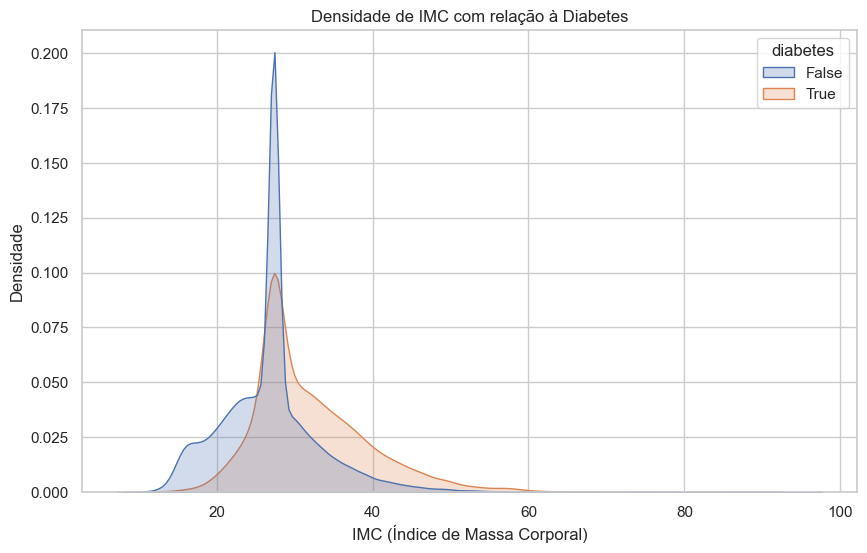

In [20]:
# Criar o gráfico de densidade usando seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Gráfico de densidade para IMC com cores diferentes para as diferentes categorias de diabetes
sns.kdeplot(data=df, x='bmi', hue='diabetes', fill=True, common_norm=False)

# Adicionar título e rótulos aos eixos
plt.title('Densidade de IMC com relação à Diabetes')
plt.xlabel('IMC (Índice de Massa Corporal)')
plt.ylabel('Densidade')

# Mostrar o gráfico
plt.show()

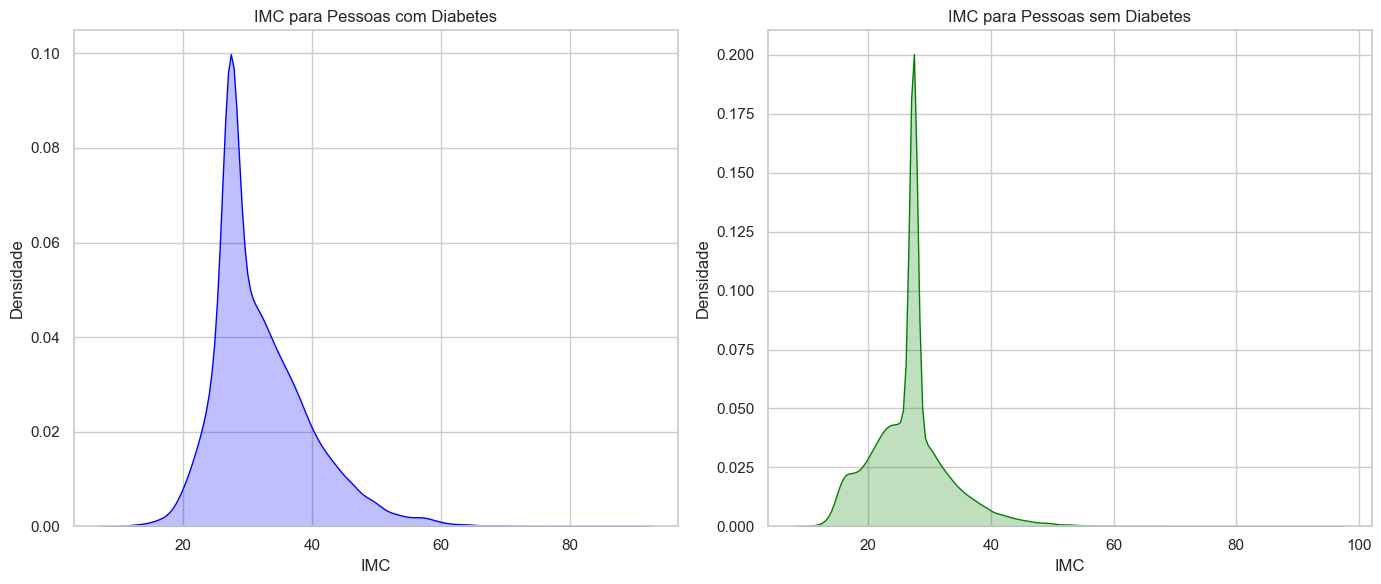

In [21]:
df_diabetes = df[df['diabetes'] == 1]
df_no_diabetes = df[df['diabetes'] == 0]

# Criar subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de densidade para IMC em relação às pessoas com diabetes
sns.kdeplot(data=df_diabetes, x='bmi', ax=axs[0], fill=True, color='blue')
axs[0].set_title('IMC para Pessoas com Diabetes')
axs[0].set_xlabel('IMC')
axs[0].set_ylabel('Densidade')

# Gráfico de densidade para IMC em relação às pessoas sem diabetes
sns.kdeplot(data=df_no_diabetes, x='bmi', ax=axs[1], fill=True, color='green')
axs[1].set_title('IMC para Pessoas sem Diabetes')
axs[1].set_xlabel('IMC')
axs[1].set_ylabel('Densidade')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os subplots
plt.show()

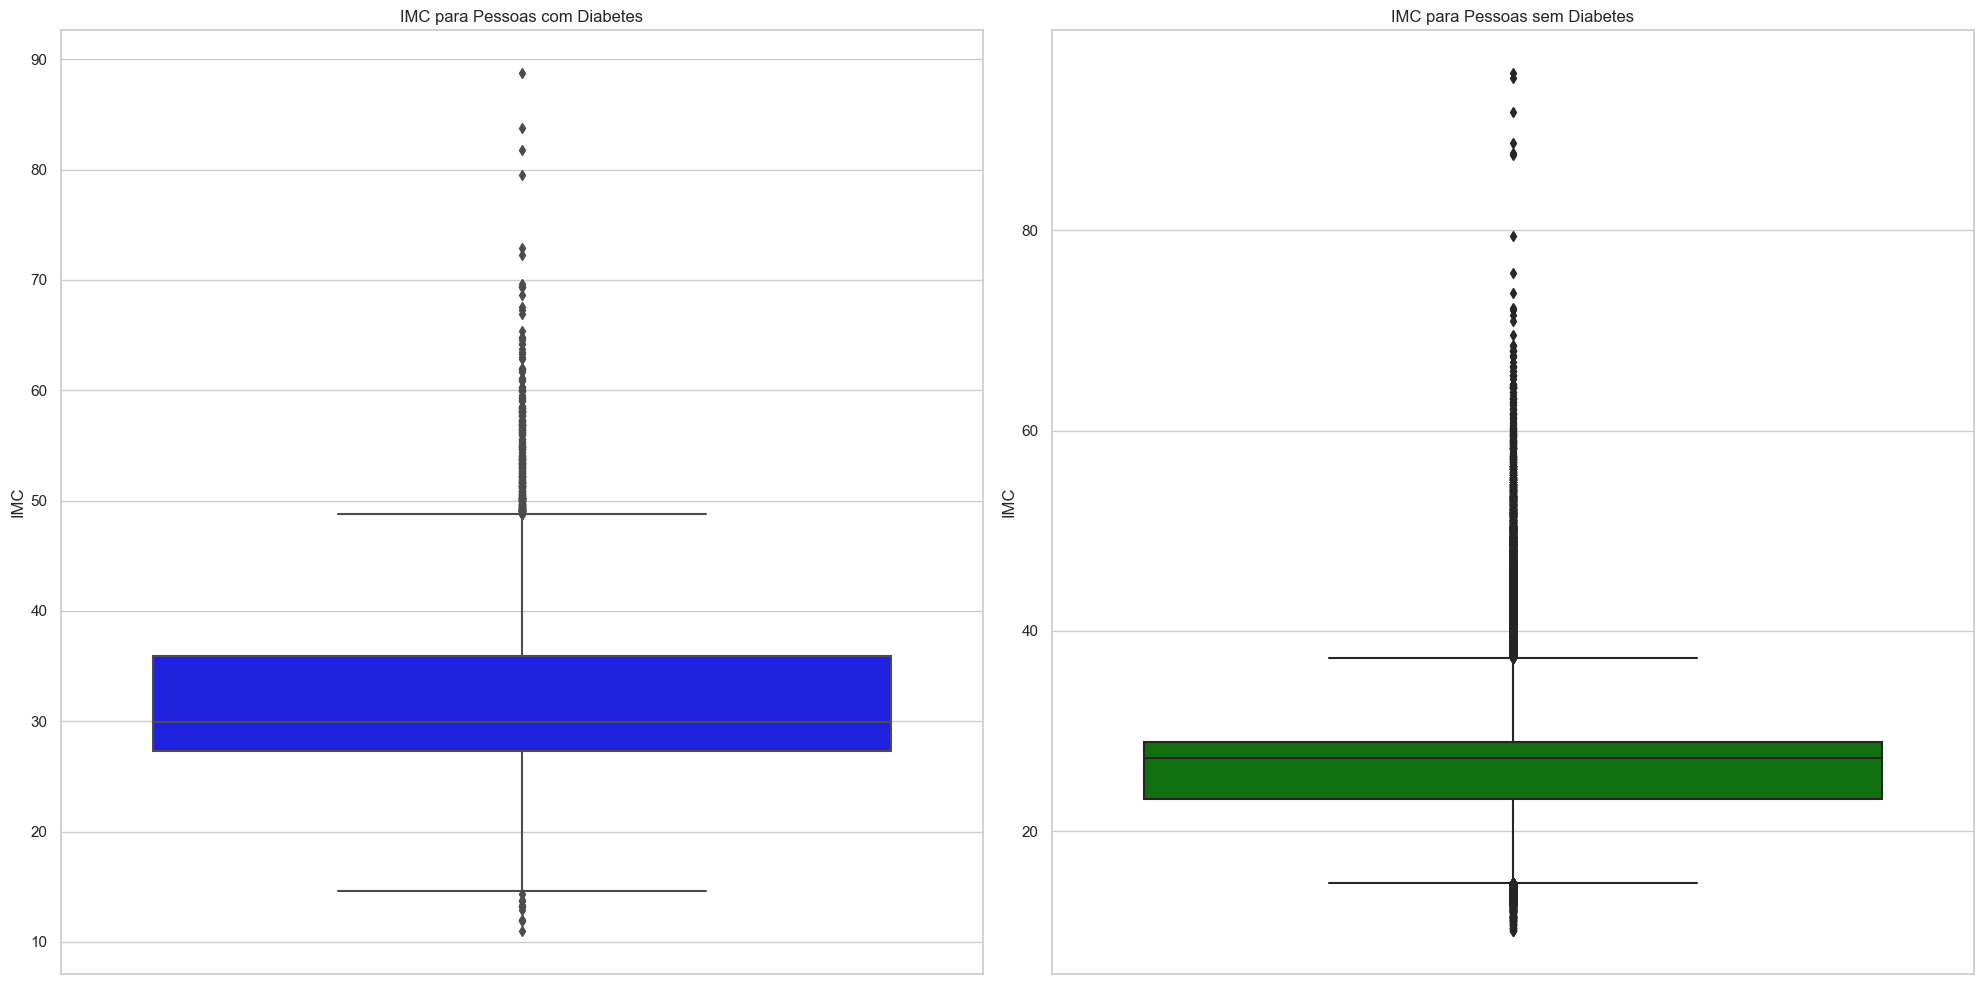

In [22]:
df_diabetes = df[df['diabetes'] == 1]
df_no_diabetes = df[df['diabetes'] == 0]

# Criar subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico de boxplot para IMC em relação às pessoas com diabetes
sns.boxplot(data=df_diabetes, y='bmi', ax=axs[0], color='blue')
axs[0].set_title('IMC para Pessoas com Diabetes')
axs[0].set_ylabel('IMC')

# Gráfico de boxplot para IMC em relação às pessoas sem diabetes
sns.boxplot(data=df_no_diabetes, y='bmi', ax=axs[1], color='green')
axs[1].set_title('IMC para Pessoas sem Diabetes')
axs[1].set_ylabel('IMC')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os subplots
plt.show()

* Com relação aos gráficos de densidade e do bloxplot é identificado que `existe uma concentração maior dos dados de não diabéticos dentro do intervalo de 20 a 30` [imc] `e uma maior concentração dos dados de diabéticos entre 30 a 40` [imc]

### Qual é a relação entre o nível de hemoglobina A1c no sangue e a diabetes?

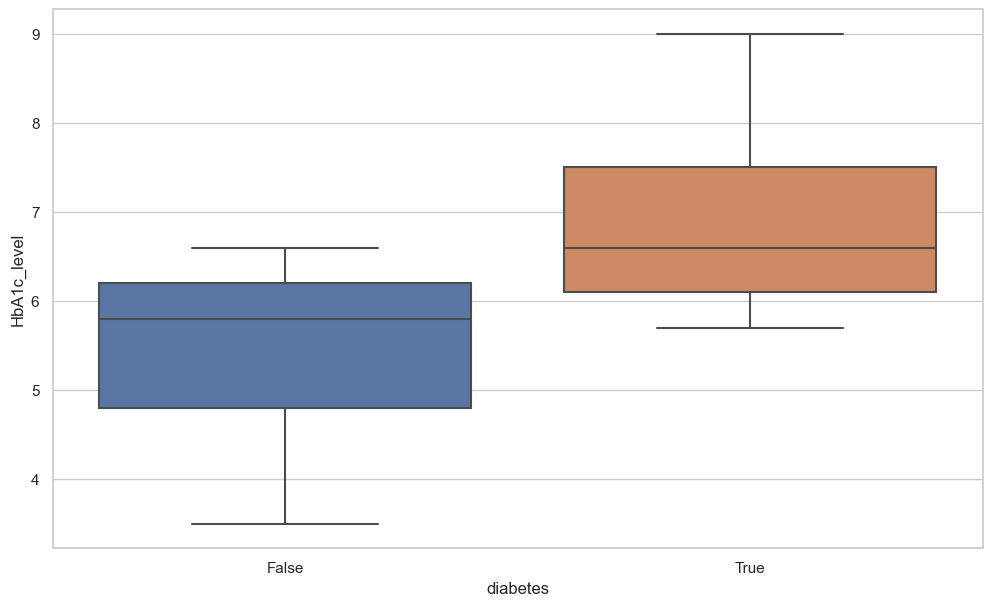

In [23]:
fig, axes = plt.subplots(figsize=(12,7))
ax = sns.boxplot(data = df, x = "diabetes", y = "HbA1c_level")
ax.grid(axis = "y" , linestyle = "-")

In [24]:
agrupamento_por_A1c = df.groupby("HbA1c_level")
quantidade_por_A1c = agrupamento_por_A1c["diabetes"].value_counts()
print(quantidade_por_A1c)

HbA1c_level  diabetes
3.5          False       7662
4.0          False       7542
4.5          False       7585
4.8          False       7597
5.0          False       7471
5.7          False       7709
             True         704
5.8          False       7662
             True         659
6.0          False       7648
             True         647
6.1          False       7397
             True         651
6.2          False       7621
             True         648
6.5          False       7749
             True         613
6.6          False       7857
             True         683
6.8          True         642
7.0          True         634
7.5          True         643
8.2          True         661
8.8          True         661
9.0          True         654
Name: diabetes, dtype: int64


---

   * Em geral, `pessoas com diabetes tem uma taxa de hemoglobina A1c maior` do que pessoas sem diabetes.
   * Segundo a literatura médica, a `taxa saudável de hemoglobina glicada é entre 4.5 e 6.4`. Isso mostra que a maior parte das pessoas sem diabetes estão com a taxa saudável, enquanto pessoas com diabetes estão com taxas acima.
   * `Pessoas com diabetes`, em geral, `possuem alta taxa de hemoglobina glicada`.

---

### Pessoas com alto índice de hemoglobina A1c e glicemia no sangue têm uma tendência maior de ter diabetes?

##### Resalvas: 
* A glicemia elevada, também conhecida como hiperglicemia, ocorre quando há muito açúcar (glicose) no sangue. Isso pode ser um sinal de diabetes ou de outros problemas de saúde.
* Os valores considerados normais de glicemia em jejum podem variar ligeiramente dependendo dos critérios médicos adotados, mas geralmente estão na faixa de 70 a 100 miligramas por decilitro (mg/dL). Valores acima dessa faixa podem indicar hiperglicemia.
* A HbA1c é uma medida do nível médio de glicose no sangue ao longo de um período de dois a três meses. Valores elevados de HbA1c indicam que os níveis de glicose no sangue têm sido consistentemente altos durante esse período. No entanto, geralmente uma HbA1c abaixo de 5,7% é considerada normal. Entre 5,7% e 6,4% é muitas vezes indicativo de pré-diabetes, e 6,5% ou superior é geralmente diagnosticado como diabetes.

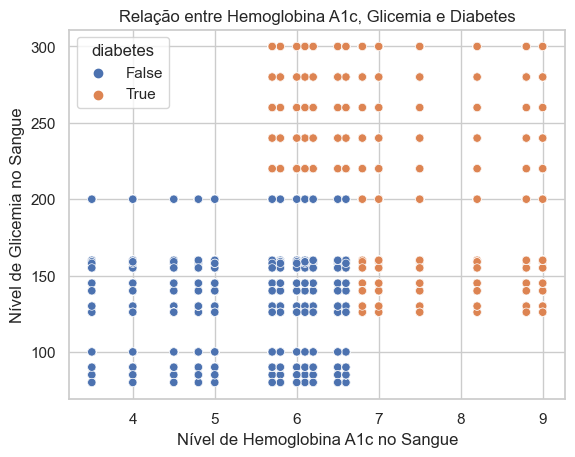

In [25]:
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', hue='diabetes', data=df)
plt.title('Relação entre Hemoglobina A1c, Glicemia e Diabetes')
plt.xlabel('Nível de Hemoglobina A1c no Sangue')
plt.ylabel('Nível de Glicemia no Sangue')
plt.show()

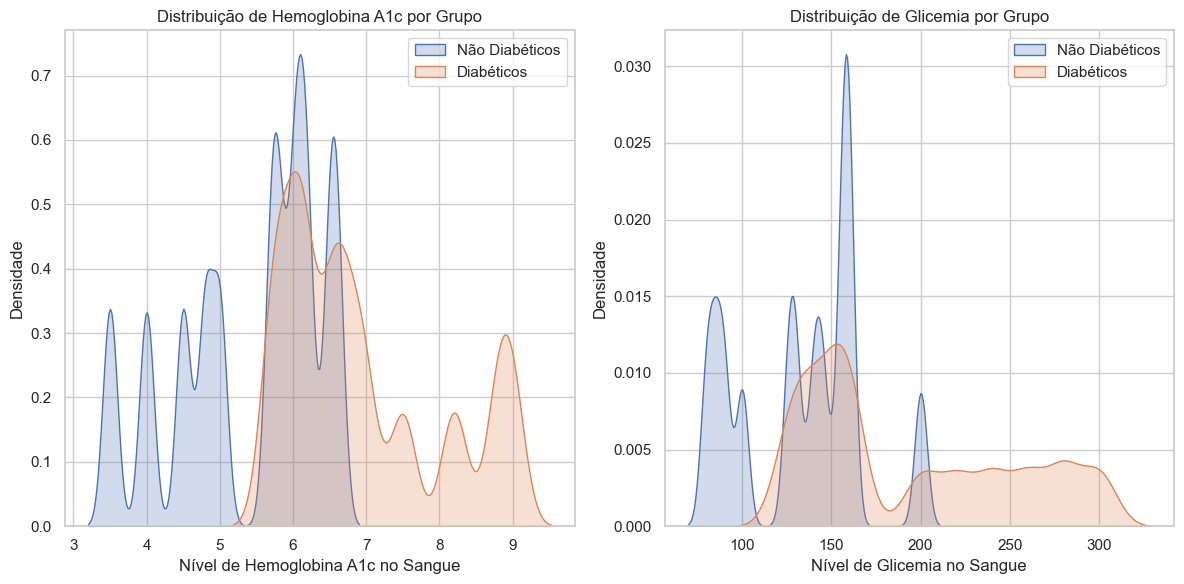

In [26]:
plt.figure(figsize=(12, 6));
plt.subplot(1, 2, 1);
sns.kdeplot(data=df[df['diabetes'] == 0]['HbA1c_level'], label='Não Diabéticos', fill=True);
sns.kdeplot(data=df[df['diabetes'] == 1]['HbA1c_level'], label='Diabéticos', fill=True);

plt.title('Distribuição de Hemoglobina A1c por Grupo');
plt.xlabel('Nível de Hemoglobina A1c no Sangue');
plt.ylabel('Densidade');
plt.legend();

plt.subplot(1, 2, 2);
sns.kdeplot(data=df[df['diabetes']  == 0]['blood_glucose_level'], label='Não Diabéticos', fill=True);
sns.kdeplot(data=df[df['diabetes'] == 1]['blood_glucose_level'], label='Diabéticos', fill=True);
plt.title('Distribuição de Glicemia por Grupo');
plt.xlabel('Nível de Glicemia no Sangue');
plt.ylabel('Densidade');
plt.legend();

plt.tight_layout();
plt.show();

--- 

* Analisando com Scatter plot: Na analise desse gráfico pode-se identificar que os dados que refere-se a `variável diabetes igual a 1 então concentrados em um local que indica um alto indice de Glicemia e Hemoglobina Ac1`, ou seja, `existe uma relação alta entre essas variáveis`
* Analisando a Densidade dos dados em relação aos diabéticos e não diabéticos é identificado que os dados dos diabéticos apresenta uma `tendêcia de contração maior conforme o valor do blood_glucose_level e HbA1c_level aumentam`
* Com base na análise realizada, pode-se concluir que `há uma forte relação entre a variável diabetes e os níveis de glicemia (blood_glucose_level) e hemoglobina A1c (HbA1c_level)`. Em suma, os resultados sugerem que altos níveis de glicemia e hemoglobina A1c estão associados a um maior risco de diabetes.

---

## 4. Insights

* Homens tem uma predisposição maior a ter diabetes.
* Pessoas com hipertensão tendem a ter mais diabetes do que pessoas sem hipertensão.
* Pessoas com diabetes, em geral, tem uma taxa de hemoglobina glicada mais alta.
* Mais pessoas do sexo feminino participaram da pesquisa.
* A grande maioria das pessoas dessa pesquisa não possuem diabetes.
* Variável diabetes igual a 1 então concentrados em um local que indica um alto indice de Glicemia e Hemoglobina Ac1
* Há uma forte relação entre a variável diabetes e os níveis de glicemia (blood_glucose_level) e hemoglobina A1c (HbA1c_level)
* Existe uma concentração maior dos dados de não diabéticos dentro do intervalo de 20 a 30 [imc] e uma maior concentração dos dados de diabéticos entre 30 a 40 [imc]
* Pessoas que já foram fumantes em comparação com pessoas que nunca fumaram, tem uma maior chance de ter diabetes no futuro
* Houve uma concentração de pessoas na variável BMI (IMC) entre 25 e 30.
* Houve uma concentração de pessoas na variável HbA1c_level entre 5 e 6 e em blood_glucose_level entre 150 e 200.